In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops


In [2]:
# Load image and convert to grayscale
img = cv2.imread('sample.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [3]:
# 1️⃣ Classical Filtering
gaussian = cv2.GaussianBlur(gray, (5,5), 0)
median = cv2.medianBlur(gray, 5)

# 2️⃣ Thresholding
_, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [4]:
# 3️⃣ Edge Detection (Canny + Sobel)
edges_canny = cv2.Canny(gaussian, 100, 200)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
edges_sobel = cv2.magnitude(sobelx, sobely)

In [5]:
# 4️⃣ Corner Detection (Harris)
gray_float = np.float32(gray)
dst = cv2.cornerHarris(gray_float, 2, 3, 0.04)
img_harris = img.copy()
img_harris[dst > 0.01 * dst.max()] = [0, 0, 255]  # mark corners in red

In [6]:
# 5️⃣ Morphological Operations
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(thresh, kernel, iterations=1)
erosion = cv2.erode(thresh, kernel, iterations=1)

In [7]:
# 6️⃣ Texture Analysis using GLCM (Gray-Level Co-occurrence Matrix)
glcm = graycomatrix(gray, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)
contrast = graycoprops(glcm, 'contrast')[0, 0]
energy = graycoprops(glcm, 'energy')[0, 0]
print(f"Texture Features -> Contrast: {contrast:.2f}, Energy: {energy:.2f}")

Texture Features -> Contrast: 1992.62, Energy: 0.01


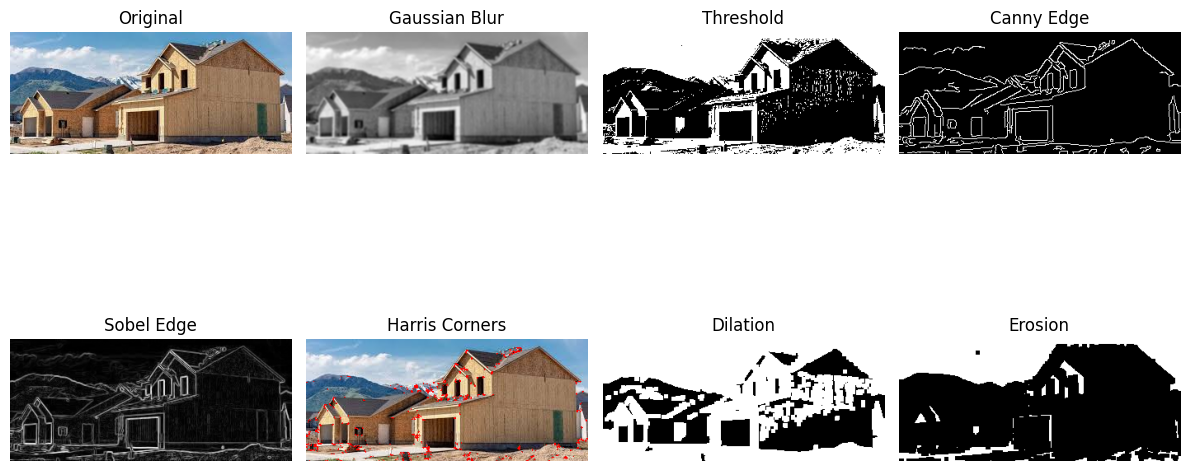

In [8]:
# 7️⃣ Display results
titles = ['Original', 'Gaussian Blur', 'Threshold', 'Canny Edge',
          'Sobel Edge', 'Harris Corners', 'Dilation', 'Erosion']
images = [img, gaussian, thresh, edges_canny, edges_sobel, img_harris, dilation, erosion]

plt.figure(figsize=(12,8))
for i in range(8):
    plt.subplot(2,4,i+1)
    if len(images[i].shape) == 2:
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()